In [17]:
# importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [16]:
# importing the dataset 

df = pd.read_csv('data.csv' , encoding = 'ISO-8859-1')

df.columns

# using the only the Height and Weight columns 

df_1 = df[['Heightin' , 'Weightlbs']] 


Question a : Compute the OLS estimator of weight given height. Add this line on a scatterplot
 (with h on the x-axis; w on the y-axis) and also provide the OLS estimator in
 equation form: ˆ w = ˆ β0 + ˆ β1h

The coefficient is :  4.600973284362754


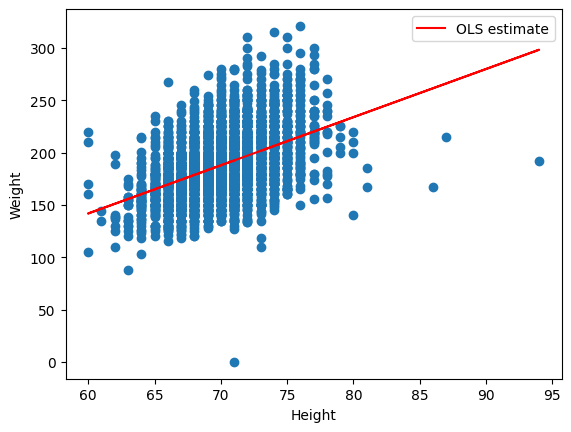

In [47]:
# finding the OLS estimator 

Ols_model = linear_model.LinearRegression()
Ols_model.fit(df_1[['Heightin']] , df_1['Weightlbs'])

coeff = Ols_model.coef_
intercept = Ols_model.intercept_
residuals = df_1['Weightlbs'] - (coeff * df_1['Heightin'] + intercept)

print('The coefficient is : ' , coeff[0])

# the predicted weight equation
predicted_wt = coeff * df_1['Heightin'] + intercept

# plotting the Linear estimate  
plt.scatter(df_1['Heightin'] , df_1['Weightlbs'])
plt.plot(df_1['Heightin'] , predicted_wt , color = 'red' , label = 'OLS estimate')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

b - Compute the sample covariance between the height and the residual of the OLS estimator. Are they correlated?

In [45]:
covariance = np.cov(df_1['Heightin'], residuals)[0, 1]
print("Sample Covariance between Height and Residuals:", covariance)

Sample Covariance between Height and Residuals: 1.5816148521550477e-13


Very very small covariance - Almost no correlation

C - Interpret the slope coefficient, ˆ β1.

The slope coefficient is 4.6 which means there for a every unit increase in Height (In inches) there is 4.6 unit increase in weight (In lbs)



D -  Compute the sample variance of the weight, the OLS estimator of the weight, and the residual. What relationship do you find among these three values?

In [62]:
var_weight = np.var(df_1['Weightlbs'] , ddof=len(df_1['Weightlbs']) - 1)
var_residuals = np.var(residuals , ddof=len(residuals) - 1)
var_predict = np.var(predicted_wt , ddof=len(predicted_wt) - 1)

sum_var_residuals_predict = var_residuals + var_predict

print("Variance of Weight:", var_weight)
print("Sum of Variance of Residuals and Variance of Predicted Weight:", sum_var_residuals_predict)

# R squared value
r_squared = var_predict / var_weight

print("R squared value:", r_squared)

# Square of the correlation coefficient 
correlation = np.corrcoef(df_1['Heightin'], df_1['Weightlbs'])[0, 1]
sq_correration = correlation ** 2

print("Square of the correlation coefficient:", sq_correration)



Variance of Weight: 3658679.9020088194
Sum of Variance of Residuals and Variance of Predicted Weight: 3658679.902008813
R squared value: 0.205128157985764
Square of the correlation coefficient: 0.20512815798576595


We notice that R-squared value is equal to Sqaure of the correlation coefficient 

The coefficient is :  0.04458364465686646


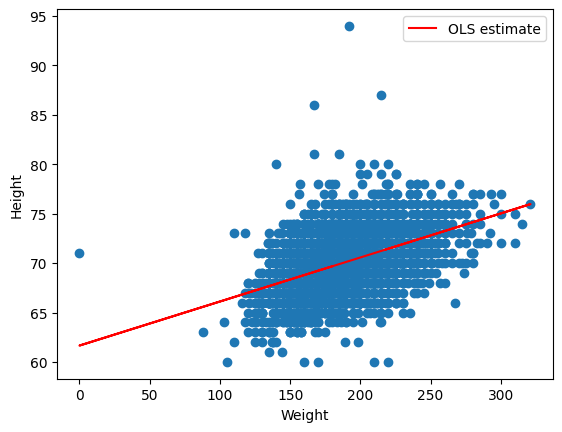

In [77]:
# with weight as predictor 
linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(df_1[['Weightlbs']] , df_1['Heightin'])

coeff_1 = linear_model_1.coef_
intercept_1 = linear_model_1.intercept_
residuals_1 = df_1['Heightin'] - (coeff_1 * df_1['Weightlbs'] + intercept_1)

# predicted height equation
predicted_ht = coeff_1 * df_1['Weightlbs'] + intercept_1

print('The coefficient is : ' , coeff_1[0])

plt.scatter(df_1['Weightlbs'] , df_1['Heightin'])
plt.plot(df_1['Weightlbs'] , predicted_ht , color = 'red' , label = 'OLS estimate')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()



There is still a linear relationship between Weight predicting height although the slope is flatter (Per unit change) compared to Height predicting Weight